# Assessment 1 - Code <br/> <br/>

## Question 1 <br/><br/>

In [1]:
# Import all the required libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
# Load STUDYA_phenotypes.txt into Pandas DataFrame
phenotype = pd.read_csv("STUDYA_phenotypes.txt", sep = "\t")
phenotype.head()


,id,n_2443_0_0,n_2976_0_0,n_2986_0_0,n_6177_0_0,n_6177_0_1,n_6177_0_2,n_20002_0_0,n_20002_0_1,n_20002_0_2,...,n_20002_0_19,n_20002_0_20,n_20002_0_21,n_20002_0_22,n_20002_0_23,n_20002_0_24,n_20002_0_25,n_20002_0_26,n_20002_0_27,n_20002_0_28
0,596136,Yes,14.0,Yes,Cholesterol lowering medication,Blood pressure medication,Insulin,1531.0,1222.0,1473.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,941068,Yes,7.0,Yes,Insulin,NaN,NaN,1222.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,865370,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,217243,No,NaN,NaN,None of the above,NaN,NaN,1396.0,1281.0,1513.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,694360,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Load STUDYA_genotypes.fam into Pandas DataFrame.
fam_STUDYA = pd.read_csv("STUDYA_genotypes.fam", sep=" ", header=None)
fam_STUDYA.head()


,0,1,2,3,4,5
0,596136,596136,0,0,2,NaN
1,941068,941068,0,0,2,NaN
2,865370,865370,0,0,2,NaN
3,217243,217243,0,0,2,NaN
4,694360,694360,0,0,2,NaN


In [4]:
# Merge the STUDYA fam file data with the phenotypes data.
fam_pheno = fam_STUDYA.merge(phenotype, left_on = 0, right_on = "id")
fam_pheno.head()


,0,1,2,3,4,5,id,n_2443_0_0,n_2976_0_0,n_2986_0_0,...,n_20002_0_19,n_20002_0_20,n_20002_0_21,n_20002_0_22,n_20002_0_23,n_20002_0_24,n_20002_0_25,n_20002_0_26,n_20002_0_27,n_20002_0_28
0,596136,596136,0,0,2,NaN,596136,Yes,14.0,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,941068,941068,0,0,2,NaN,941068,Yes,7.0,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,865370,865370,0,0,2,NaN,865370,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,217243,217243,0,0,2,NaN,217243,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,694360,694360,0,0,2,NaN,694360,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Define T1D status for all the individuals
for index, row in fam_pheno.iterrows():
    if ((row["n_2443_0_0"] == "Yes") & (row["n_2976_0_0"] <= 20) & (row["n_2986_0_0"] == "Yes") & ((row["n_6177_0_0":"n_6177_0_2"] == "Insulin").any()) & ((row["n_20002_0_0":"n_20002_0_28"] != float(1223)).all())):
        fam_pheno.iloc[index, 5] = "1"
    else:
        fam_pheno.iloc[index, 5] = "0"

# Return a modified fam dataset
fam_STUDYA = fam_pheno[[0,1,2,3,4,5]]
fam_STUDYA.head()


,0,1,2,3,4,5
0,596136,596136,0,0,2,1
1,941068,941068,0,0,2,1
2,865370,865370,0,0,2,0
3,217243,217243,0,0,2,0
4,694360,694360,0,0,2,0


In [6]:
#Write the modified data into the original STUDYA_genotypes.fam.
fam_STUDYA.to_csv("STUDYA_genotypes.fam", sep = " ", index=False, header=None)


## <br/><br/> Question 2 <br/> 

### &emsp; 2.1. Genetic Ancestry Analysis <br/> <br/>

#### &emsp;&emsp;&emsp; 2.1.1. Principal Component Analysis <br/>

In [7]:
#Load 1000G_data.bim into Pandas DataFrame
bim_1000G = pd.read_csv("1000G_data.bim", sep="\t", header=None)
bim_1000G.head()


,0,1,2,3,4,5
0,1,1:840753,0,840753,C,T
1,1,1:873558,0,873558,G,T
2,1,1:897738,0,897738,T,C
3,1,1:959509,0,959509,G,T
4,1,1:1094979,0,1094979,G,A


In [8]:
#Load 1000G_data.fam into Pandas DataFrame
fam_1000G = pd.read_csv("1000G_data.fam", sep=" ", header=None)
fam_1000G.head()


,0,1,2,3,4,5
0,EUR,HG00096,0,0,0,-9
1,EUR,HG00097,0,0,0,-9
2,EUR,HG00099,0,0,0,-9
3,EUR,HG00100,0,0,0,-9
4,EUR,HG00101,0,0,0,-9


In [9]:
# Get the number of bytes required for each variant
import math
bytes_per_var = math.ceil(len(fam_1000G.index) / 4)

# Get the number of variants
nVars = len(bim_1000G.index)

# Define mask used to get at the data
mask = 3 #(00000011)

# Define dictionary mapping number returned from & binary operator using the mask
genoMap = {0:2, 1:"NaN", 2:1, 3:0}

# Create an empty list to store numeric genotype values for each variant
allvar_geno = []
  
# Open the 1000G_data bed file
with open("1000G_data.bed", "rb") as f:
    
    # Loop through each variant in the .bim file  
    for i in range(nVars):
        
        # Get to the first byte of the next SNP
        byteIndex = 3 + i * bytes_per_var
        
        # Create an empty numpy array to hold numeric genotype values - pre-allocate 
        genotypeArray = np.zeros(len(fam_1000G.index))
       
        # Go to the byte index containing the first individual for the variant we want to extract 
        f.seek(byteIndex)

        # Read the number of bytes we need
        b = f.read(bytes_per_var)
    
        # Record the number of individuals we have tracked down 
        j = 0

        # Loop through each byte returned by f.read() 
        for byte in b:
        
            # Loop through each genotype from the byte
            # - unless we are done with all individuals
            for i in range(4):
            
                # Carry out binary and (&) with the mask flagging the last two bits of the byte 
                genoBits = (byte & mask)
            
                # Convert the returned number using the dictionary and add it in the numpy array above 
                genotypeArray[j] = genoMap[genoBits]
            
                # Increase the number of individuals we have come across   
                j += 1
            
                # Check we did not cycle through all the individuals
                if j != len(fam_1000G.index):
                   
                    # Shift the bits 2 to the right so we can use the mask again for the next binary genotype 
                    byte >>= 2
                else:
                    break
                    
        # Convert the numpy array storing the numeric genotypes into a list and add it into the empty list 
        allvar_geno.append(list(genotypeArray))

    # Convert the new 2D list into a 2D numpy array then print it
    allvar_gen = np.array(allvar_geno)
    print(allvar_gen)
                               

[[1. 2. 1. ... 2. 0. 1.]
 [1. 2. 0. ... 2. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [2. 1. 1. ... 1. 2. 1.]
 [1. 0. 1. ... 0. 1. 2.]
 [0. 0. 1. ... 0. 0. 0.]]


In [10]:
#Transpose the 2D numpy array to a suitable format for PCA
X1 = np.transpose(allvar_gen)
X1


array([[1., 1., 0., ..., 2., 1., 0.],
       [2., 2., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [2., 2., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 2., 1., 0.],
       [1., 1., 0., ..., 1., 2., 0.]])

In [11]:
# Create Principal Component Space to project individuals onto it
# Record the PCs values for each individual into a 2D numpy array
pca = PCA(n_components=10)
Y1 = pca.fit_transform(X1)

# Extract PCs values from Y1 and link up to IDs and ancestries
ref_samples_pcs = pd.concat([fam_1000G[[0,1]], pd.DataFrame(Y1)], axis=1)
ref_samples_pcs.columns = ["POP","IID","PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"]
ref_samples_pcs.head()


,POP,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,EUR,HG00096,-3.847902,-27.662487,6.734765,-9.873442,0.204494,3.674108,-1.036548,-1.479915,-1.226875,-0.748625
1,EUR,HG00097,-4.104296,-28.346020,5.847931,-9.233890,-0.105992,2.510104,-0.587247,0.480864,0.076623,2.101977
2,EUR,HG00099,-3.911243,-28.916022,8.073144,-9.893047,-0.536309,3.292926,0.187897,-1.470830,1.201871,-2.437207
3,EUR,HG00100,-4.203602,-28.696154,7.562494,-10.741733,0.270746,0.683577,0.221170,-0.753471,1.517354,-0.475629
4,EUR,HG00101,-4.299548,-27.495600,7.557628,-10.678022,0.749309,3.691351,-0.430865,-0.770194,-1.318339,-1.211128


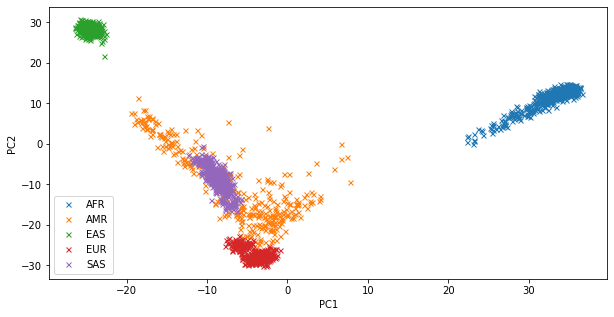

In [12]:
#Plot the scores for PC1 against those for PC2
ref_groups = ref_samples_pcs.groupby("POP")
fig, ax = plt.subplots(figsize = (10, 5))
ax.margins(0.05)
for name, group in ref_groups:
    ax.plot(group.PC1, group.PC2, marker="x", linestyle="", ms=5, label=name)
    
ax.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


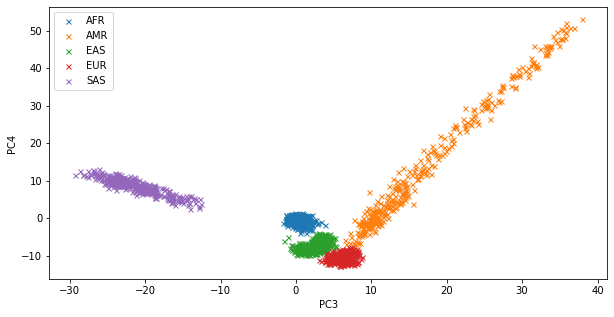

In [13]:
#Plot the scores for PC3 against those for PC4
fig, ax = plt.subplots(figsize = (10, 5))
ax.margins(0.05)
for name, group in ref_groups:
    ax.plot(group.PC3, group.PC4, marker="x", linestyle="", ms=5, label=name)
    
ax.legend()
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.show()


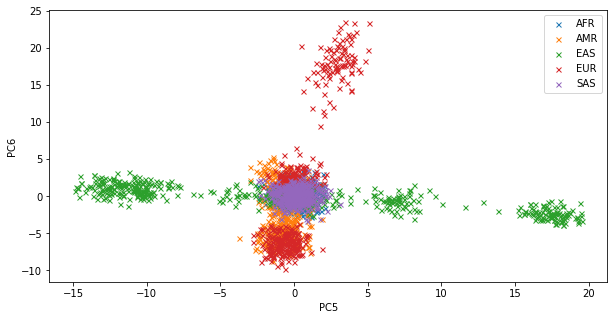

In [14]:
#Plot the scores for PC5 against those for PC6
fig, ax = plt.subplots(figsize = (10, 5))
ax.margins(0.05)
for name, group in ref_groups:
    ax.plot(group.PC5, group.PC6, marker="x", linestyle="", ms=5, label=name)
    
ax.legend()
plt.xlabel("PC5")
plt.ylabel("PC6")
plt.show()


In [15]:
#Load STUDYA_genotypes.bim into Pandas DataFrame
bim_STUDYA = pd.read_csv("STUDYA_genotypes.bim", sep="\t", header=None)
bim_STUDYA.head()


,0,1,2,3,4,5
0,1,1:840753,0,840753,C,T
1,1,1:873558,0,873558,G,T
2,1,1:897738,0,897738,T,C
3,1,1:959509,0,959509,G,T
4,1,1:1094979,0,1094979,G,A


In [16]:
# Get the number of bytes required for each variant
import math
bytes_per_var = math.ceil(len(fam_STUDYA.index) / 4)

# Get the number of variants
nVars = len(bim_STUDYA.index)

# Define mask used to get at the data
mask = 3 #(00000011)

# Define dictionary mapping number returned from & binary operator using the mask
genoMap = {0:2, 1:"NaN", 2:1, 3:0}

# Create an empty list to store numeric genotype values for each variant
allvar_geno = []
  
# Open the 1000G_data bed file
with open("STUDYA_genotypes.bed", "rb") as f:
    
    # Loop through each variant in the .bim file  
    for i in range(nVars):
        
        # Get to the first byte of the next SNP
        byteIndex = 3 + i * bytes_per_var
        
        # Create an empty numpy array to hold numeric genotype values - pre-allocate 
        genotypeArray = np.zeros(len(fam_STUDYA.index))
       
        # Go to the byte index containing the first individual for the variant we want to extract 
        f.seek(byteIndex)

        # Read the number of bytes we need
        b = f.read(bytes_per_var)
    
        # Record the number of individuals we have tracked down 
        j = 0

        # Loop through each byte returned by f.read() 
        for byte in b:
        
            # Loop through each genotype from the byte
            # - unless we are done with all individuals
            for i in range(4):
            
                # Carry out binary and (&) with the mask flagging the last two bits of the byte 
                genoBits = (byte & mask)
            
                # Convert the returned number using the dictionary and add it in the numpy array above 
                genotypeArray[j] = genoMap[genoBits]
            
                # Increase the number of individuals we have come across   
                j += 1
            
                # Check we did not cycle through all the individuals
                if j != len(fam_STUDYA.index):
                   
                    # Shift the bits 2 to the right so we can use the mask again for the next binary genotype 
                    byte >>= 2
                else:
                    break
                    
        # Convert the numpy array storing the numeric genotypes into a list and add it into the empty list
        allvar_geno.append(list(genotypeArray))

    # Convert the new 2D list into a 2D numpy array then print it
    allvar_gen = np.array(allvar_geno)
    print(allvar_gen)
                               

[[0. 0. 1. ... 0. 2. 2.]
 [0. 1. 1. ... 0. 1. 2.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [2. 1. 1. ... 0. 2. 1.]
 [1. 2. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# Transpose the 2D numpy array to a suitable format for PCA
# Input missing values based on the mean genotype value of the respective variant 
X2 = np.transpose(allvar_gen)
X2 = np.where(np.isnan(X2), ma.array(X2, mask=np.isnan(X2)).mean(axis=0), X2)
X2


array([[0., 0., 0., ..., 2., 1., 0.],
       [0., 1., 0., ..., 1., 2., 0.],
       [1., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [2., 1., 0., ..., 2., 1., 0.],
       [2., 2., 0., ..., 1., 0., 0.]])

In [18]:
# Project the individuals from STUDYA onto the principal component space
# Record the PCs values for each individual into a 2D numpy array
Y2 = pca.transform(X2)
Y2


array([[ -4.52603057, -28.80383137,   5.93657645, ...,   0.53842131,
          0.73010791,   0.05421808],
       [ -4.68636652, -28.93982105,   6.96482795, ...,  -0.75759988,
         -0.22124296,   0.20197492],
       [ -3.3740696 , -27.44074574,   5.73367805, ...,   0.23003601,
          1.18939039,   1.81772149],
       ...,
       [ -4.70578761, -27.52029347,   5.52633758, ...,   0.23662682,
          0.36498387,  -0.05706445],
       [ -3.85595493, -28.24522195,   6.55456766, ...,   0.07474942,
          0.87253848,   0.62024736],
       [ -2.95962027, -29.37551705,   6.306266  , ...,  -0.5018174 ,
         -1.03472248,   0.81007871]])

In [19]:
# Extract PCs values from Y2 and link up to study IDs
# Input unknown (NONE) ancestry for each individual
STUDYA_samples_pcs = pd.concat([fam_STUDYA[0], pd.DataFrame(Y2)], axis=1)
STUDYA_samples_pcs.columns = ["ID","PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"]
STUDYA_samples_pcs.insert(0,"POP","NONE")
STUDYA_samples_pcs.head()


,POP,ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,NONE,596136,-4.526031,-28.803831,5.936576,-10.487217,-0.039743,1.325210,-0.056074,0.538421,0.730108,0.054218
1,NONE,941068,-4.686367,-28.939821,6.964828,-9.861396,0.128090,1.585836,0.128518,-0.757600,-0.221243,0.201975
2,NONE,865370,-3.374070,-27.440746,5.733678,-9.650713,-0.001588,1.157035,-0.768442,0.230036,1.189390,1.817721
3,NONE,217243,-3.564622,-27.215493,5.926394,-10.571583,1.201354,2.539564,0.199724,-0.774666,0.280380,-0.303836
4,NONE,694360,-4.216345,-28.936422,6.802009,-9.533057,-0.023549,1.329694,0.686000,-0.624272,0.954293,0.593863


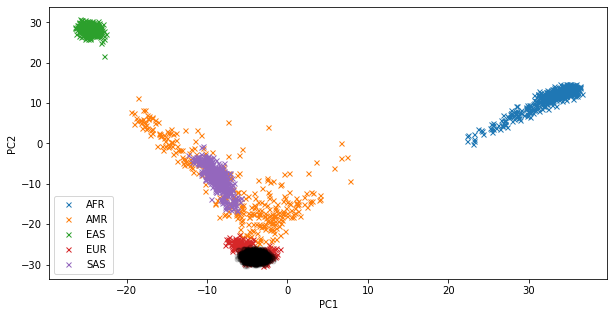

In [20]:
# Plot the reference PC1 and PC2 scores overlaid with those from STUDYA
fig, ax = plt.subplots(figsize = (10, 5))
ax.margins(0.05)
for name, group in ref_groups:
    ax.plot(group.PC1, group.PC2, marker="x", linestyle="", ms=5, label=name)
    
ax.plot(STUDYA_samples_pcs["PC1"], STUDYA_samples_pcs["PC2"], marker="o", c="black",
linestyle="", alpha=0.15, ms=5)
    
ax.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


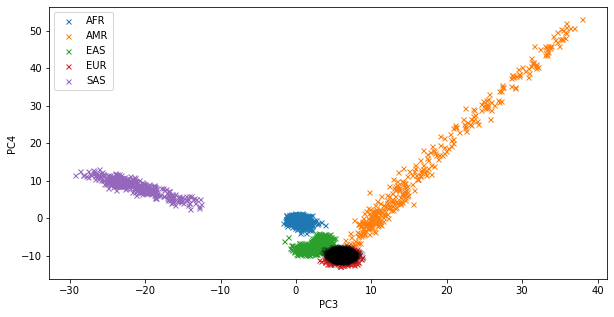

In [21]:
# Plot the reference PC3 and PC4 scores overlaid with those from STUDYA
fig, ax = plt.subplots(figsize = (10, 5))
ax.margins(0.05)
for name, group in ref_groups:
    ax.plot(group.PC3, group.PC4, marker="x", linestyle="", ms=5, label=name)
    
ax.plot(STUDYA_samples_pcs["PC3"], STUDYA_samples_pcs["PC4"], marker="o", c="black",
linestyle="", alpha=0.15, ms=5)
    
ax.legend()
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.show()


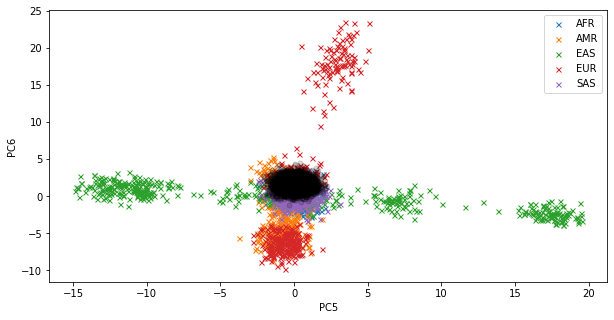

In [22]:
# Plot the reference PC5 and PC6 scores overlaid with those from STUDYA
fig, ax = plt.subplots(figsize = (10, 5))
ax.margins(0.05)
for name, group in ref_groups:
    ax.plot(group.PC5, group.PC6, marker="x", linestyle="", ms=5, label=name)
    
ax.plot(STUDYA_samples_pcs["PC5"], STUDYA_samples_pcs["PC6"], marker="o", c="black",
linestyle="", alpha=0.15, ms=5)
    
ax.legend()
plt.xlabel("PC5")
plt.ylabel("PC6")
plt.show()


#### &emsp;&emsp;&emsp; 2.1.2. K-nearest Neighbors Classification <br/>

In [23]:
# Standardize the first five reference PCs as range of values across PCs differ
standardizer = StandardScaler()
X3 = standardizer.fit_transform(ref_samples_pcs.iloc[:,2:7].values)

# Define target values
y = ref_samples_pcs.iloc[:,0]

# Set up grid of K-Nearest Neighbors hyperparameters 
gridParameters = {"n_neighbors": range(1,100,2),
                  "weights" : ["uniform", "distance"],
                  "metric" : ["euclidean", "manhattan", "minkowski"]
                  
                 }


# Cross-validate (5 folds) K-NN Classifiers on the standardized PCs, using the grid
gridSearch = GridSearchCV(KNeighborsClassifier(), gridParameters, cv=5, verbose=0)
gridSearchResults = gridSearch.fit(X3,y)

# Print best K-NN parameters, in terms of classification accuracy
print(gridSearchResults.best_params_)


{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [24]:
# Standardize the first five STUDYA PCs 
X4 = standardizer.transform(STUDYA_samples_pcs[["PC1","PC2","PC3","PC4","PC5"]])

# Classify the STUDYA individuals and return labels as a list
STUDYA_samples_ancestry = gridSearchResults.predict(X4).tolist()

# Label their genetic ancestries inferred through KNN
STUDYA_samples_pcs["POP"] = STUDYA_samples_ancestry
STUDYA_samples_pcs["POP"].value_counts()


EUR    5000
Name: POP, dtype: int64

### <br/><br/> &emsp; 2.2. Genetic Association Analysis and Meta-Analysis <br/> <br/>

In [25]:
# Load STUDYA_genotypes_gwas.txt into Pandas DataFrame
t1d_results = pd.read_csv("STUDYA_genotypes_gwas.txt", delimiter="\t")
t1d_results.head()


,SNP,Effect_Allele,Other_Allele,Effect,SE,Z-stat,P-value
0,1:840753,C,T,0.00649,0.04082,0.15887,0.8738
1,1:873558,G,T,0.04708,0.04524,1.04055,0.2981
2,1:897738,T,C,0.02952,0.08332,0.35424,0.7232
3,1:959509,G,T,0.07373,0.06728,1.09580,0.2732
4,1:1094979,G,A,0.00212,0.04130,0.05133,0.9591


In [26]:
# Load STUDYB_ASSOC_RESULTS.txt into Pandas DataFrame
STUDYB_results = pd.read_csv("STUDYB_ASSOC_RESULTS.txt", delimiter="\t")
STUDYB_results.head()


,SNP,Effect_Allele,Other_Allele,Effect,SE,Z-stat,P-value
0,1:114377568,A,G,0.67020,0.02288,29.29113,1.345000e-188
1,1:206939904,A,G,-0.16326,0.02186,-7.46712,8.197000e-14
2,2:163124051,C,T,-0.14739,0.01576,-9.35186,8.612000e-21
3,2:204738919,A,G,-0.19075,0.01517,-12.57098,3.049000e-36
4,4:123377980,C,A,-0.11629,0.01692,-6.87193,6.334000e-12


In [27]:
# Load STUDY_meta_analysis_results.txt into Pandas DataFrame
STUDY_ma_results = pd.read_csv("STUDY_meta_analysis_results.txt", delimiter="\t")
STUDY_ma_results.head()


,Markername,Effect_Allele,Other_Allele,Effect,SE,Z-stat,Pvalue
0,1:840753,C,T,0.01,0.0408,0.1590,0.8737
1,1:873558,G,T,0.05,0.0452,1.0407,0.2980
2,1:897738,T,C,0.03,0.0833,0.3543,0.7231
3,1:959509,G,T,0.07,0.0673,1.0959,0.2731
4,1:1094979,G,A,0.00,0.0413,0.0513,0.9591


In [28]:
# Load allele_weights.txt into Pandas DataFrame
allele_weights = pd.read_csv("allele_weights.txt", delimiter="\t")

# Merge common variants between allele_weights/MA to check consistency in effects (and direction)
ma_weights = allele_weights.merge(STUDY_ma_results[["Markername","Effect_Allele","Other_Allele","Effect","Pvalue"]], left_on="variant", right_on="Markername", how="inner")
ma_weights.head()


,variant,weighted_allele,weight,Markername,Effect_Allele,Other_Allele,Effect,Pvalue
0,1:114377568,A,0.67,1:114377568,A,G,0.67,1.571000e-213
1,1:206939904,G,0.17,1:206939904,A,G,-0.17,8.316000e-17
2,2:163124051,T,0.15,2:163124051,C,T,-0.15,3.077000e-24
3,2:204738919,G,0.20,2:204738919,A,G,-0.20,8.079000e-45
4,4:123377980,A,0.11,4:123377980,C,A,-0.11,3.176000e-12


In [29]:
# Extracted variants from MA all fall below the significant threshold (<5e-08)
ma_weights["Pvalue"].max()


2.643e-11

In [30]:
# Cycle through rows of the ma_weights DF
for index, row in ma_weights.iterrows():
    if row["Effect_Allele"] != row["weighted_allele"]:
        
        # Assign non-effect allele (MA) with effect one (MA)
        ma_weights.at[index,"Other_Allele"] = ma_weights.at[index,"Effect_Allele"]
        
        # Match effect allele (MA) with weighted allele (Oram et al.)
        ma_weights.at[index,"Effect_Allele"] = ma_weights.at[index,"weighted_allele"]
        
        # Swap direction of effect allele (MA) as necessary
        ma_weights.at[index,"Effect"] = ma_weights.at[index,"weight"]
             
# Return the updated MA results for these variants
ma_weights = ma_weights[["Markername","Effect_Allele","Other_Allele","Effect"]]
ma_weights.head()


,Markername,Effect_Allele,Other_Allele,Effect
0,1:114377568,A,G,0.67
1,1:206939904,G,A,0.17
2,2:163124051,T,C,0.15
3,2:204738919,G,A,0.20
4,4:123377980,A,C,0.11


## <br/><br/> Question 3: Genetic Risk Score - T1D <br/><br/>

In [31]:
#Load 5_individuals.txt into Pandas DataFrame
individuals = pd.read_csv("5_individuals.txt", sep="\t")
individuals.head()


,VARIANT_ID1,VARIANT_ID2,A1,A2,Per132_A2_COUNT,Per523_A2_COUNT,Per854_A2_COUNT,Per943_A2_COUNT,Per938_A2_COUNT
0,1:114377568,rs2476601,A,G,2,2,2,2,2
1,1:206939904,rs3024505,G,A,0,1,0,0,1
2,2:163124051,rs1990760,C,T,2,0,1,1,1
3,2:204738919,rs3087243,G,A,1,2,1,1,1
4,4:123377980,rs2069762,A,C,2,0,1,1,1


In [32]:
# Merge updated MA association results onto the genotypes
t1d_wags = pd.merge(ma_weights, individuals, left_on="Markername", right_on="VARIANT_ID1", how="inner")
t1d_wags.head()


,Markername,Effect_Allele,Other_Allele,Effect,VARIANT_ID1,VARIANT_ID2,A1,A2,Per132_A2_COUNT,Per523_A2_COUNT,Per854_A2_COUNT,Per943_A2_COUNT,Per938_A2_COUNT
0,1:114377568,A,G,0.67,1:114377568,rs2476601,A,G,2,2,2,2,2
1,1:206939904,G,A,0.17,1:206939904,rs3024505,G,A,0,1,0,0,1
2,2:163124051,T,C,0.15,2:163124051,rs1990760,C,T,2,0,1,1,1
3,2:204738919,G,A,0.20,2:204738919,rs3087243,G,A,1,2,1,1,1
4,4:123377980,A,C,0.11,4:123377980,rs2069762,A,C,2,0,1,1,1


In [33]:
# Create 2d numpy array (X) to hold weighted alleles
# Preallocate for X
X = np.zeros((len(t1d_wags.index),len(t1d_wags.columns)-8))

# Cycle through rows of the t1d_wags DF
for index, row in t1d_wags.iterrows():
    
    # Get the weight for variant on row of DF above
    w = row["Effect"]
    
    # Create an array to hold genotypes of the variant on the row
    g = row[8:].to_numpy()
    
    # Flip genotype codes as necessary
    if row["Effect_Allele"] != row["A2"]:
        g = 2-g
    
    # Store in weighted alleles matrix
    X[index] = g*w
    
# Print out weighted genotypes on the first three variants for the 5 individuals
print(X[:3,:5])


[[0.   0.   0.   0.   0.  ]
 [0.34 0.17 0.34 0.34 0.17]
 [0.3  0.   0.15 0.15 0.15]]


In [34]:
# Create DF containing the individual IDs and the sum of the weighted alleles
partial_grs = pd.DataFrame(data={"ID": t1d_wags.columns[8:], "SW": X.sum(axis=0)})
partial_grs.loc[0,"ID"] = "Per132"
partial_grs.loc[1,"ID"] = "Per523"
partial_grs.loc[2,"ID"] = "Per854"
partial_grs.loc[3,"ID"] = "Per943"
partial_grs.loc[4,"ID"] = "Per938"
partial_grs


,ID,SW
0,Per132,7.47
1,Per523,13.66
2,Per854,13.22
3,Per943,12.97
4,Per938,7.43


In [35]:
# Load interaction_weights.txt into Pandas DataFrame
interaction_weights = pd.read_csv("interaction_weights.txt", delimiter="\t")
interaction_weights


,snp1,snp1_geno,snp1_A2_count,snp2,snp2_geno,snp2_A2_count,weight
0,6:32605884,TC,1,6:32681483,CT,1,3.87
1,6:32605884,TT,2,6:32681483,TT,0,3.05
2,6:32605884,CC,0,6:32681483,CC,2,3.09
3,6:32605884,CC,0,6:32681483,CT,1,1.95
4,6:32605884,TC,1,6:32681483,TT,0,1.51


In [36]:
# Get the interaction weight for each individual
individuals.iloc[8:10]


,VARIANT_ID1,VARIANT_ID2,A1,A2,Per132_A2_COUNT,Per523_A2_COUNT,Per854_A2_COUNT,Per943_A2_COUNT,Per938_A2_COUNT
8,6:32605884,rs2187668,C,T,0,0,1,1,1
9,6:32681483,rs7454108,T,C,2,2,1,0,1


In [37]:
# Store the interaction weight for each individual IDs in a DataFrame
IW_indiv = pd.DataFrame(columns= ["Per132", "Per523", "Per854", "Per943", "Per938"])
IW_indiv.loc[0] = [3.09,3.09,3.87,1.51,3.87]
IW_indiv = IW_indiv.T.reset_index()
IW_indiv.columns = ["ID", "IW"]
IW_indiv


,ID,IW
0,Per132,3.09
1,Per523,3.09
2,Per854,3.87
3,Per943,1.51
4,Per938,3.87


In [38]:
# Link up individual IDs and grs with their interaction weight
partial_grs1 = pd.merge(partial_grs, IW_indiv, on="ID")
partial_grs1


,ID,SW,IW
0,Per132,7.47,3.09
1,Per523,13.66,3.09
2,Per854,13.22,3.87
3,Per943,12.97,1.51
4,Per938,7.43,3.87


In [39]:
# Cycle through rows of the partial_grs1 DF
for index, row in partial_grs1.iterrows():
    
    # Calculate and store T1D-GRS for each individual in grs column
    partial_grs1.at[index,"grs"] = (partial_grs1.at[index,"SW"] + partial_grs1.at[index,"IW"]) / ((28 * 2) + 2)

# Return the final grs for each individual IDs
final_grs = partial_grs1[["ID","grs"]]
final_grs


,ID,grs
0,Per132,0.182069
1,Per523,0.288793
2,Per854,0.294655
3,Per943,0.249655
4,Per938,0.194828


## <br/><br/> Oram et al study: T1D-GRS <br/><br/>

In [40]:
# Load t1d_cases.txt into Pandas DataFrame
t1d_cases = pd.read_csv("t1d_cases.txt", delimiter="\t")

# Input T1D case status for each individual
t1d_cases.insert(loc=1, column="T1D", value=1)
t1d_cases.head()


,id,T1D,t1d_grs
0,1,1,0.233365
1,2,1,0.246548
2,3,1,0.226363
3,4,1,0.249322
4,5,1,0.225322


In [41]:
# Load t1d_controls.txt into Pandas DataFrame
t1d_controls = pd.read_csv("t1d_controls.txt", delimiter="\t")

# Input T1D control status for each individual
t1d_controls.insert(loc=1, column="T1D", value=0)
t1d_controls.head()


,id,T1D,t1d_grs
0,1,0,0.170971
1,2,0,0.240047
2,3,0,0.232411
3,4,0,0.210797
4,5,0,0.227734


In [42]:
# Concatenate T1D cases and controls into a single DataFrame
grs_with_pheno = pd.concat([t1d_cases, t1d_controls])

# Create quartile variable
grs_quartiles = pd.qcut(grs_with_pheno["t1d_grs"], 4, labels=["Q1","Q2","Q3","Q4"])

# Add this variable to the concatenated DataFrame
grs_with_pheno["grs_quartile"] = grs_quartiles
grs_with_pheno.head()

# Check we get roughly equal counts
grs_with_pheno["grs_quartile"].value_counts()


Q4    972
Q2    972
Q1    972
Q3    971
Name: grs_quartile, dtype: int64

In [43]:
# Create a DataFrame storing the frequency of cases and controls across the quartiles
T1D_quartile = pd.crosstab(grs_with_pheno.grs_quartile, grs_with_pheno.T1D).apply(lambda x: x/x.sum(), axis=1).reset_index()
T1D_quartile.columns = ["grs_quartile","freq_controls", "freq_cases"]
T1D_quartile


,grs_quartile,freq_controls,freq_cases
0,Q1,0.930041,0.069959
1,Q2,0.651235,0.348765
2,Q3,0.315139,0.684861
3,Q4,0.083333,0.916667


Text(0, 0.5, 'Prevalence of T1D')

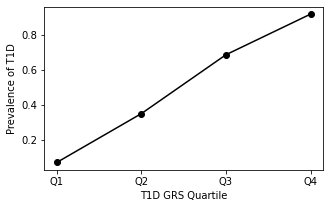

In [44]:
# Visualize the frequency of cases across the quartiles
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(T1D_quartile.grs_quartile.values, T1D_quartile.freq_cases,"-o", color="black")
ax.set_xlabel("T1D GRS Quartile")
ax.set_ylabel("Prevalence of T1D")


In [45]:
# Create a DataFrame storing the grs range (min/max) across each quartile
grs_range = pd.DataFrame(columns=["grs_min","grs_max"])

# Get and store grs min and max across Q1 in the DF
grs_range.loc[0,"grs_min"] = grs_with_pheno.loc[grs_with_pheno["grs_quartile"] == "Q1", "t1d_grs"].min()
grs_range.loc[0,"grs_max"] = grs_with_pheno.loc[grs_with_pheno["grs_quartile"] == "Q1", "t1d_grs"].max()

# Get and store grs min and max across Q2 in the DF
grs_range.loc[1,"grs_min"] = grs_with_pheno.loc[grs_with_pheno["grs_quartile"] == "Q2", "t1d_grs"].min()
grs_range.loc[1,"grs_max"] = grs_with_pheno.loc[grs_with_pheno["grs_quartile"] == "Q2", "t1d_grs"].max()

# Get and store grs min and max across Q3 in the DF
grs_range.loc[2,"grs_min"] = grs_with_pheno.loc[grs_with_pheno["grs_quartile"] == "Q3", "t1d_grs"].min()
grs_range.loc[2,"grs_max"] = grs_with_pheno.loc[grs_with_pheno["grs_quartile"] == "Q3", "t1d_grs"].max()

# Get and store grs min and max across Q4 in the DF
grs_range.loc[3,"grs_min"] = grs_with_pheno.loc[grs_with_pheno["grs_quartile"] == "Q4", "t1d_grs"].min()
grs_range.loc[3,"grs_max"] = grs_with_pheno.loc[grs_with_pheno["grs_quartile"] == "Q4", "t1d_grs"].max()

# Concatenate T1D_quartile with grs_range
quartile_info = pd.concat([T1D_quartile, grs_range], axis=1)
quartile_info


,grs_quartile,freq_controls,freq_cases,grs_min,grs_max
0,Q1,0.930041,0.069959,0.114706,0.22921
1,Q2,0.651235,0.348765,0.22923,0.257951
2,Q3,0.315139,0.684861,0.25797,0.284085
3,Q4,0.083333,0.916667,0.284125,0.344858


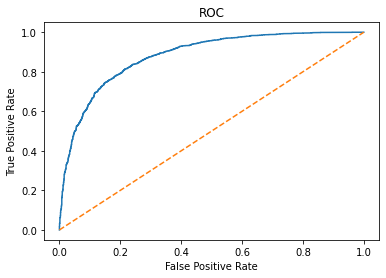

P-value threshold: [1.34485816 0.34485815 0.32434872 ... 0.16449712 0.16414007 0.11470593], ROC AUC: 0.88


In [46]:
# Store T1D grs and status columns into 1D Numpy arrays
T1D_grs = np.array(grs_with_pheno["t1d_grs"])
T1D_pheno = np.array(grs_with_pheno["T1D"])

# Extract the false-postive and true-positive rates across different thresholds of GRS cutoffs
# for case/control status.
fpr, tpr, thresholds = roc_curve(T1D_pheno, T1D_grs)

# Plot ROC Curve
plt.title("ROC")
plt.plot(fpr, tpr)
plt.plot([0,1], ls="--")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# Print out GRS thresholds along with the AUC
print("P-value threshold: " + str(thresholds) + ", ROC AUC: "
+ str(round(roc_auc_score(T1D_pheno, T1D_grs),3)))
